# Подготовка

In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
BiocManager::install("DESeq2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 Patched (2022-11-10
  r83330)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘bitops’, ‘formatR’, ‘plogr’, ‘png’, ‘Biostrings’, ‘RCurl’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘lambda.r’, ‘futile.options’, ‘XML’, ‘xtable’, ‘RSQLite’, ‘KEGGREST’, ‘GenomeInfoDb’, ‘XVector’, ‘MatrixGenerics’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘annotate’, ‘AnnotationDbi’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘matrixStats’, ‘locfit’, ‘geneplotter’, ‘Rcpp’, ‘RcppArmadillo’


Old packages: 'bit', 'data.table', 'devtools', 'knitr', 'pkgload', 'tidyverse',
  'vctrs', 'xfun', 'foreign'



In [3]:
install.packages("pheatmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library("DESeq2")
library("pheatmap")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: M

In [14]:
info <- data.frame(row.names = c("r1", "r2", "r3", "c1", "c2", "c3"),
                   id = c("SRR3414629", "SRR3414630", "SRR3414631", "SRR3414635", "SRR3414636", "SRR3414637"), 
                   condition = c("reprogramming", "reprogramming", "reprogramming", "control", "control", "control"))

counts <- as.matrix(read.table("ALL.counts", header=TRUE, row.names=1, sep =","))

dds <- DESeqDataSetFromMatrix(countData = counts, colData = info, design = ~ condition)


Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [15]:
head(info)

,id,condition
,<chr>,<chr>
r1,SRR3414629,reprogramming
r2,SRR3414630,reprogramming
r3,SRR3414631,reprogramming
c1,SRR3414635,control
c2,SRR3414636,control
c3,SRR3414637,control


In [16]:
head(counts)

,r1,r2,r3,c1,c2,c3
ENSMUSG00000000001.4,4489,3919,5700,3431,3504,4031
ENSMUSG00000000003.15,0,0,0,0,0,0
ENSMUSG00000000028.15,345,273,468,150,136,152
ENSMUSG00000000031.16,64504,33249,64992,55526,48225,56064
ENSMUSG00000000037.17,77,68,87,41,44,52
ENSMUSG00000000049.11,4,1,1,10,8,10


In [17]:
# Tell the DDS which columns correspond to the 'reference' level of gene expression
dds$condition <- relevel(dds$condition, ref="control")

dds <- DESeq(dds)
res <- results(dds, alpha=0.01)   # Specify a more strict threshold on padj. This threshold is called 'alpha'


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



# Построение графиков

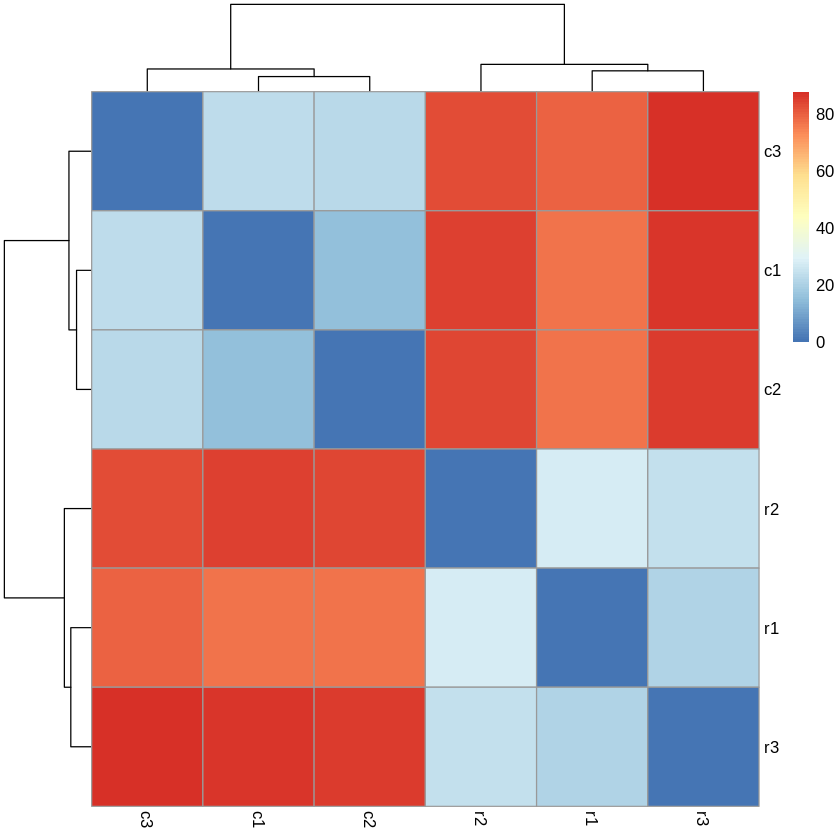

In [18]:
rld <- rlog(dds)
sampleDists <- dist(t(assay(rld)))
sampleDistMatrix <- as.matrix(sampleDists)
pheatmap(sampleDistMatrix, clustering_distance_rows=sampleDists, clustering_distance_cols=sampleDists)


In [19]:
resOrdered <- res[order(res$padj),]
resSignificant <- subset(resOrdered, padj < 0.01)
write.table(resSignificant, "differentially_expressed_genes.txt", sep="\t", row.names=TRUE, quote = FALSE)

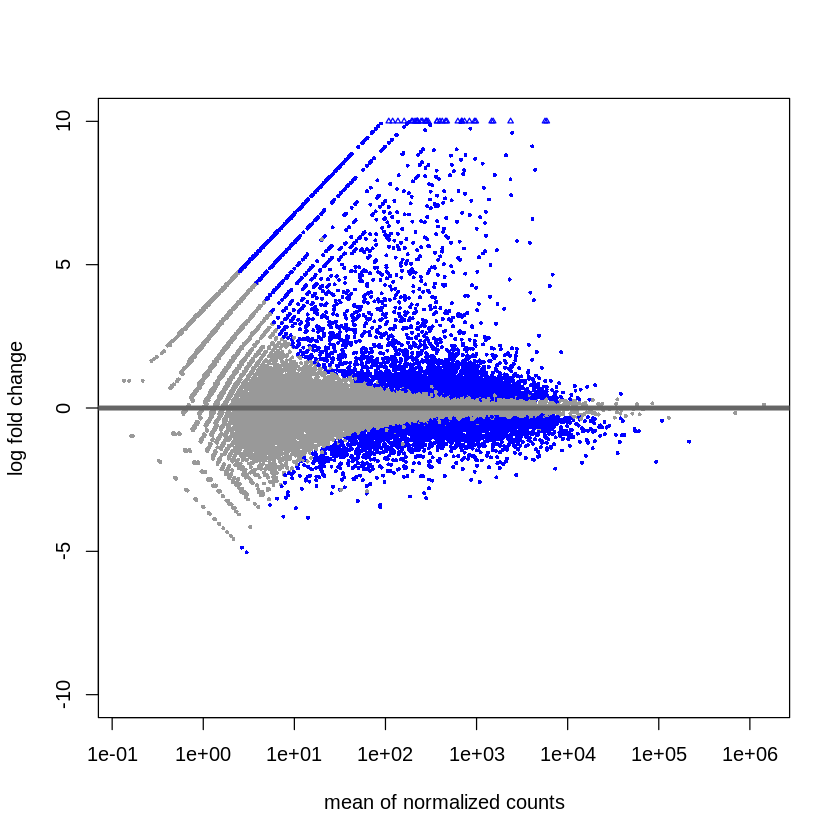

In [20]:
plotMA(res, ylim=c(-10,10))

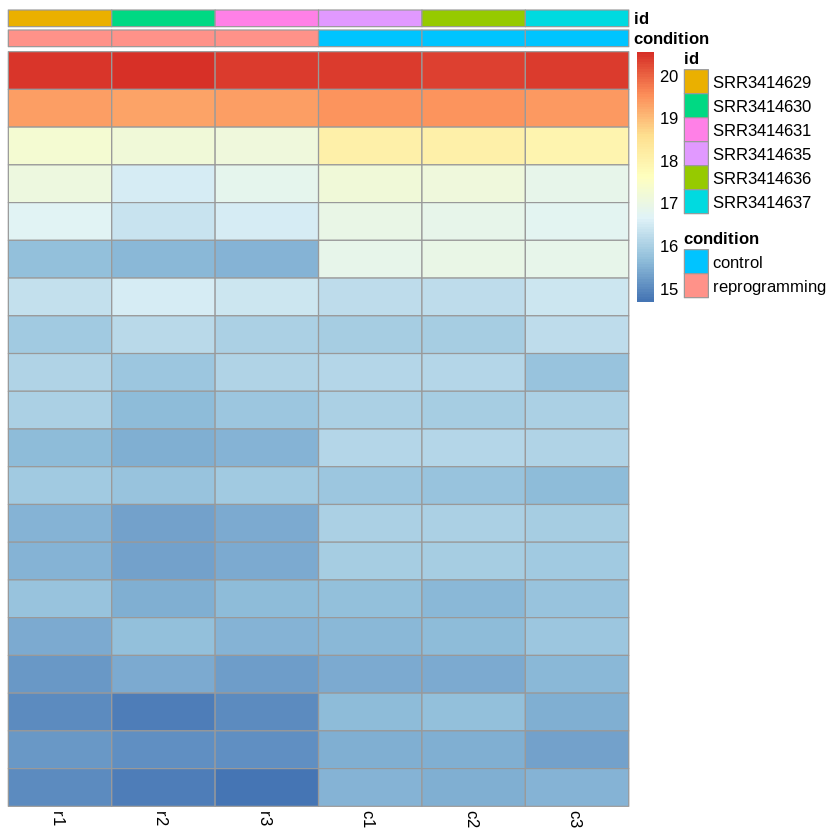

In [21]:
select <- order(rowMeans(counts(dds,normalized=TRUE)),decreasing=TRUE)[1:20]
df <- as.data.frame(colData(dds)[,c("condition","id")])
pheatmap(assay(rld)[select,], cluster_rows=FALSE, show_rownames=FALSE,cluster_cols=FALSE, annotation_col=df)


Посмотрим какие наиболее значимо поменяли свою экспрессию:

In [22]:
resSignificant

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 6714 rows and 6 columns
                       baseMean log2FoldChange     lfcSE      stat     pvalue
                      <numeric>      <numeric> <numeric> <numeric>  <numeric>
ENSMUSG00000000303.12   2782.23        5.82553  0.143003   40.7371          0
ENSMUSG00000025608.9    4401.66        8.31228  0.197504   42.0866          0
ENSMUSG00000045545.8    4088.30        9.12444  0.238756   38.2166          0
ENSMUSG00000047586.4    2408.96        7.42300  0.196905   37.6983          0
ENSMUSG00000054889.10   6835.31        4.65301  0.114964   40.4737          0
...                         ...            ...       ...       ...        ...
ENSMUSG00000027828.12 10595.158      -0.361334  0.123101  -2.93527 0.00333259
ENSMUSG00000000916.15   184.169       0.509197  0.173480   2.93519 0.00333347
ENSMUSG00000020948.9    363.595       0.422392  0.143919   2.93492

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                       baseMean log2FoldChange     lfcSE      stat    pvalue
                      <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSMUSG00000000303.12   2782.23        5.82553  0.143003   40.7371         0
                           padj
                      <numeric>
ENSMUSG00000000303.12         0

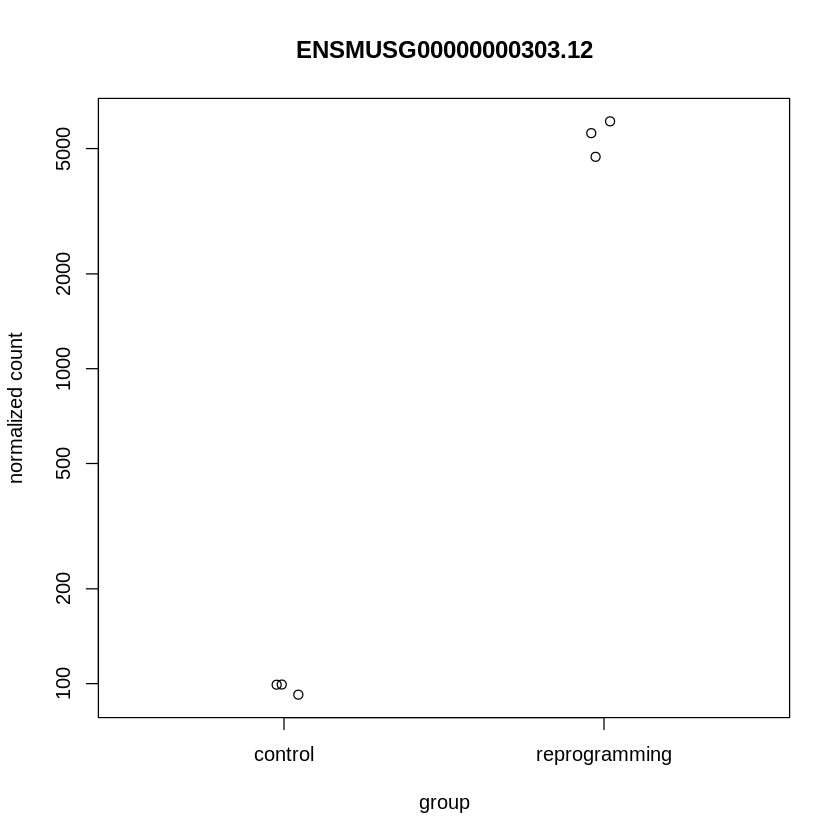

In [23]:
resSignificant[1,]
plotCounts(dds, gene = "ENSMUSG00000000303.12", intgroup="condition")

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                      baseMean log2FoldChange     lfcSE      stat    pvalue
                     <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSMUSG00000025608.9   4401.66        8.31228  0.197504   42.0866         0
                          padj
                     <numeric>
ENSMUSG00000025608.9         0

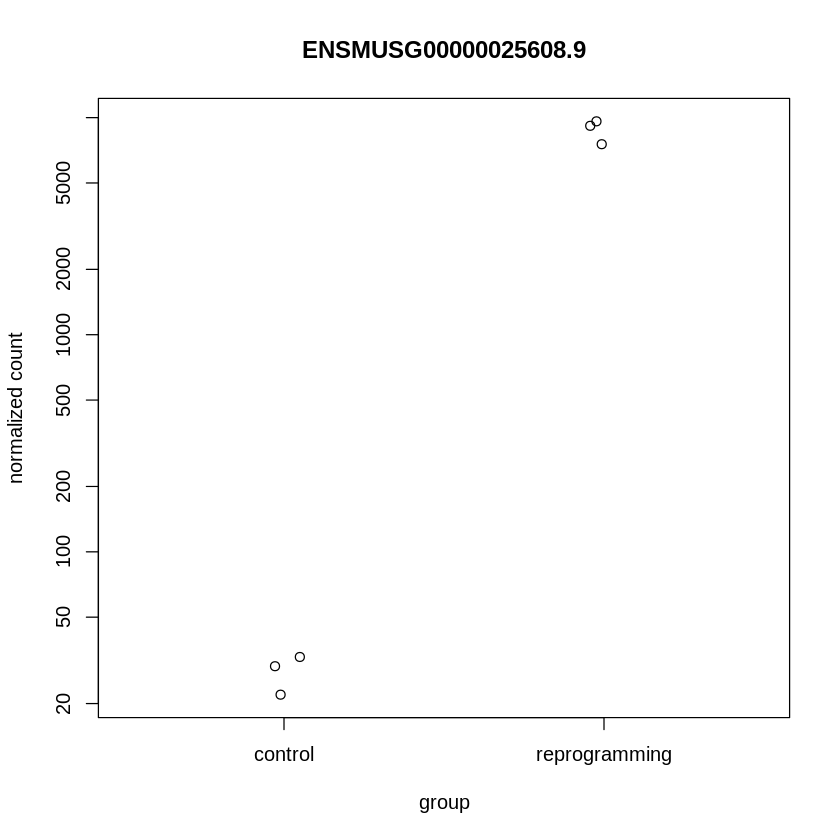

In [24]:
resSignificant[2,]
plotCounts(dds, gene = "ENSMUSG00000025608.9", intgroup="condition")

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                      baseMean log2FoldChange     lfcSE      stat    pvalue
                     <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSMUSG00000045545.8    4088.3        9.12444  0.238756   38.2166         0
                          padj
                     <numeric>
ENSMUSG00000045545.8         0

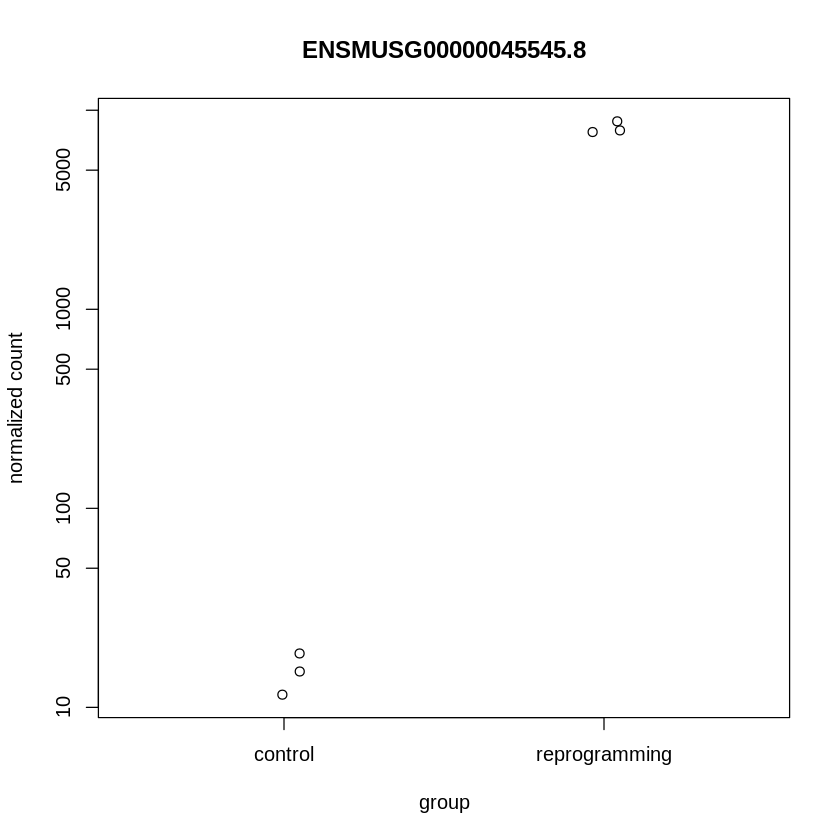

In [26]:
resSignificant[3,]
plotCounts(dds, gene = "ENSMUSG00000045545.8", intgroup="condition")